# Building Machine Learning models for detecting power system disturbances

<h3>Activities</h3>
<ol type="1">
    <li>Data preparation</li>
    <li>Exploratory Data Analysis(Data exploration)</li>
    <li>Data preprocessing 
        <ul>
            <li> Handling outliers </li> 
            <li> Label encoding </li> 
            <li> Data scaling </li> 
            <li> Handling class imbalance </li> 
        </ul>
    <li> Building ML models
        <ul>
            <li> Logistic regression </li> 
            <li> Random forest </li> 
            <li> KNN </li> 
        </ul>
     <li> Model evaluation </li>
     <li> Feature selection and engineering</li>
     <li>Hyper parameter tuning</li>
     <li>Communicate the insights obtained.</li>
</ol>

# Importing libraries

In [250]:
# for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np
from numpy import mean, absolute

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for statistical models
import statsmodels.api as statsm

# for preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler

# for model selection and fitting 
 
from sklearn.ensemble import RandomForestClassifier # ensemble model classification
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score     # cross-validation
from sklearn.model_selection import GridSearchCV


# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Data preparation

### Loading and reading data

In [251]:
# read all the datasets and concatenate them to be one dataframe 

# creating a list for all the datasets
data=['data1.csv','data2.csv','data3.csv','data4.csv','data5.csv','data6.csv','data7.csv',
      'data8.csv','data9.csv','data10.csv','data11.csv','data12.csv','data13.csv','data14.csv','data15.csv']
  
main_df = pd.DataFrame(pd.read_csv(data[0]))    # read the the first dataset in the list   
 
# looping through the data list starting from the second  
for i in range(1,len(data)):
    df = pd.DataFrame(pd.read_csv(data[i]))
    main_df = pd.concat([main_df,df],axis=0,ignore_index=True)        # concatenate the first df with the rest dfs 

sample_data =main_df.sample(frac=0.05,random_state=1)                  # getting a random sample of 5% of the whole dataset
sample_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0,0,0,0,0,0,0,0,0,Natural
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0,0,0,0,0,0,0,0,0,Attack
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0,0,0,0,0,0,0,0,0,Attack
3952,-1.661578,123686.4409,-121.656129,123084.6824,118.350162,123736.5875,-17.051224,878.19556,-137.578626,883.13953,...,0,0,0,1,1,0,0,0,0,Attack
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0,0,0,0,0,0,0,0,0,Attack
7717,1.426665,124087.6132,-118.550697,123485.8548,121.438405,124137.7598,-14.066114,882.04087,-134.381521,885.51996,...,0,0,0,1,1,0,0,0,0,Attack
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0,0,0,0,0,0,0,0,0,Attack
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0,0,0,0,0,0,0,0,0,Attack


In [252]:
sample_data.shape       # getting the shape of the concatenated dataframe

(3919, 129)

After concatinating all the data and selecting 5% of the whole dataset, rows are 3919 rows and 129 columns. 5% of the dataset was selected as a sample to be used for the analysis.

# Exploratory Data Analysis(Data exploration)

In [253]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3919 entries, 60732 to 24002
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 3.9+ MB


In [254]:
# see the columns in the dataset
sample_data.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log',
       'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4',
       'marker'],
      dtype='object', length=129)

In [255]:
sample_data.head(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0,0,0,0,0,0,0,0,0,Natural
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0,0,0,0,0,0,0,0,0,Attack
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0,0,0,0,0,0,0,0,0,Attack
3952,-1.661578,123686.4409,-121.656129,123084.6824,118.350162,123736.5875,-17.051224,878.19556,-137.578626,883.13953,...,0,0,0,1,1,0,0,0,0,Attack
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0,0,0,0,0,0,0,0,0,Natural
59242,-140.718435,131534.3744,99.316504,131534.3744,-20.678047,131634.6675,-142.689409,399.17980,96.411608,404.30688,...,0,0,0,0,0,0,0,0,0,Attack
21669,62.675853,132085.9864,-57.301509,131459.1546,-177.301790,132136.1329,62.028411,324.65403,-58.178135,325.56958,...,0,0,0,0,0,0,0,0,0,Attack
13258,-121.174844,137175.8602,118.848635,137150.7869,-1.134456,137251.0800,-115.359323,346.07790,117.376134,382.51679,...,0,0,0,0,0,0,0,0,0,Attack
21310,-8.634474,130631.7367,-128.611836,130606.6634,111.388725,130706.9565,-7.597420,406.68731,-131.654242,426.82941,...,0,0,0,0,0,0,0,0,0,Attack
38415,82.293928,132060.9131,-37.683434,132035.8398,-157.689444,132136.1329,88.395929,334.54197,-33.265930,341.50015,...,0,0,0,0,0,0,0,0,0,Attack


In [256]:
sample_data.tail(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
15759,-164.352944,131609.5942,75.687725,131584.5210,-44.318285,131659.7408,-167.154707,399.36291,72.748451,401.56023,...,0,0,0,0,0,0,0,0,0,NoEvents
53153,-125.208467,131383.9348,114.797824,130757.1031,-5.185268,131434.0813,-128.863938,435.80180,111.251215,435.98491,...,0,0,0,0,0,0,0,0,0,Attack
7906,-78.437922,131409.0081,161.568369,130782.1763,41.562358,131484.2279,-70.525375,154.91106,166.965631,158.75637,...,0,0,0,0,0,0,0,0,0,Attack
53916,-132.863183,130882.4694,107.148837,130255.6377,-12.834255,130932.6159,-137.928130,502.27073,102.089620,502.63695,...,0,0,0,0,0,0,0,0,0,Attack
19222,168.655857,132261.4993,48.672765,132236.4260,-71.321786,132361.7923,173.010336,262.21352,49.612415,271.00280,...,0,0,0,0,0,0,0,0,0,Attack
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0,0,0,0,0,0,0,0,0,Attack
7717,1.426665,124087.6132,-118.550697,123485.8548,121.438405,124137.7598,-14.066114,882.04087,-134.381521,885.51996,...,0,0,0,1,1,0,0,0,0,Attack
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0,0,0,0,0,0,0,0,0,Attack
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0,0,0,0,0,0,0,0,0,Attack
24002,61.719014,132161.2062,-58.264078,132136.1329,-178.264359,132236.4260,61.856524,295.53954,-58.149487,294.99021,...,0,0,0,0,0,0,0,0,0,Natural


In [ ]:
sample_data.sample(10)

In [257]:
# understanding the wholedatase numerically
sample_data.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,...,3919.0,3919.0,3919.000000,3919.000000,3919.000000,3919.000000,3919.0,3919.0,3919.0,3919.0
mean,-15.318520,130573.388090,0.926098,130831.555120,5.416961,131191.480343,-13.305355,394.766143,2.586718,389.626355,...,0.0,0.0,0.034448,0.023986,0.028068,0.034703,0.0,0.0,0.0,0.0
std,101.152296,9724.002928,110.755631,6958.584861,97.816538,7013.087817,100.159133,190.960171,108.460939,152.325307,...,0.0,0.0,0.182399,0.153024,0.165189,0.183049,0.0,0.0,0.0,0.0
min,-179.943125,0.000000,-179.914477,0.000000,-179.977503,0.000000,-179.822804,0.000000,-179.822804,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-100.299127,131032.909000,-103.903031,130681.883200,-70.880609,131108.128800,-97.471580,308.540350,-94.984943,314.399870,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-27.307169,131684.814000,4.990462,131333.788300,11.012249,131734.960600,-21.239545,382.333680,0.034377,387.277650,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,69.153141,132186.279400,103.120944,131885.400200,85.230337,132236.426000,68.124682,458.415885,100.531175,462.261195,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.908748,148834.930700,179.662376,148784.784200,179.931666,148885.077300,179.931666,1772.687910,179.994691,1260.346130,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


Decribe shows that some of the columns have maximum value which is high and the mean which is low which may indicate outliers

In [258]:
# understanding the class marker data numerically
sample_data.groupby('marker').describe()

R1-PA1:VH                                                            \
             count       mean         std         min         25%        50%   
marker                                                                         
Attack      2759.0 -14.864388  100.691834 -179.943125  -98.540146 -26.992042   
Natural      965.0 -19.069597  103.322744 -178.923260 -111.130894 -33.581056   
NoEvents     195.0  -3.180885   96.084777 -175.909502  -86.115557  -1.294885   

                                R1-PM1:V                 ... snort_log3       \
                75%         max    count           mean  ...        75%  max   
marker                                                   ...                   
Attack    69.740423  179.908748   2759.0  130488.503719  ...        0.0  0.0   
Natural   67.270975  178.149767    965.0  130628.073150  ...        0.0  0.0   
NoEvents  71.814530  176.883531    195.0  131503.772174  ...        0.0  0.0   

         snort_log4                                     
              count mean  std  min  25%  50%  75%  max  
marker                                                  
Attack       2759.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Natural       965.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
NoEvents      195.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 1024 columns]

In [259]:
# checking how many unique classes are there
sample_data['marker'].unique()

array(['Natural', 'Attack', 'NoEvents'], dtype=object)

In [260]:
sample_data['marker'].describe()

count       3919
unique         3
top       Attack
freq        2759
Name: marker, dtype: object

attack id the topmost with higher frequency

In [261]:
sample_data['marker'].value_counts() 

Attack      2759
Natural      965
NoEvents     195
Name: marker, dtype: int64

The class has imbalances in it, attack has many values than other classes which can mislead the model. This misbalance is going to be addressed in pre-processing using smote method. smote method passes in the final values of x and y thus it is going to be addressed in preprocessing after label encoding and data scaling

In [262]:
# checking for nan values and counting their total
sample_data.isnull().sum().sum()

0

The dataset has no nan values

In [263]:
# checking for duplicates 
duplicates=sample_data.duplicated().sum()
print("Number of duplicates in the dataset:",duplicates)

Number of duplicates in the dataset: 2


In [264]:
# drop duplicates
dup = sample_data.drop_duplicates(inplace=True)

In [265]:
# checking if they are no longer there
sample_data.duplicated().sum()

0

In [266]:
sample_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0,0,0,0,0,0,0,0,0,Natural
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0,0,0,0,0,0,0,0,0,Attack
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0,0,0,0,0,0,0,0,0,Attack
3952,-1.661578,123686.4409,-121.656129,123084.6824,118.350162,123736.5875,-17.051224,878.19556,-137.578626,883.13953,...,0,0,0,1,1,0,0,0,0,Attack
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0,0,0,0,0,0,0,0,0,Attack
7717,1.426665,124087.6132,-118.550697,123485.8548,121.438405,124137.7598,-14.066114,882.04087,-134.381521,885.51996,...,0,0,0,1,1,0,0,0,0,Attack
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0,0,0,0,0,0,0,0,0,Attack
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0,0,0,0,0,0,0,0,0,Attack


### Univariate analysis

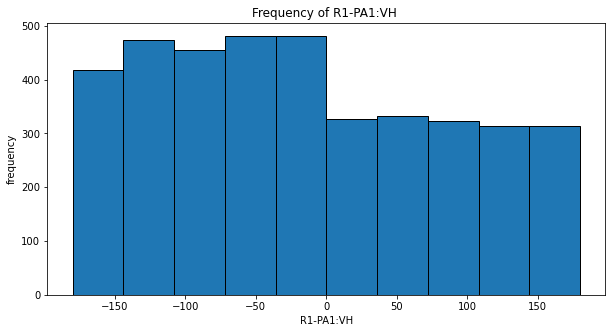

In [267]:
# ploting the first column 
plt.figure(figsize=(10,5))          # Adjusting the plot size
plt.hist(sample_data['R1-PA1:VH'],bins=10,ec='black')

# title and labelling
plt.title("Frequency of R1-PA1:VH ")
plt.xlabel('R1-PA1:VH')
plt.ylabel('frequency')
plt.show()

Observation: The graph above shows that higher values for R1-PA1:VH values are negatives

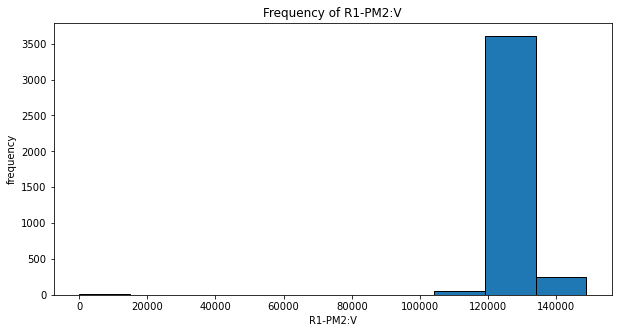

In [268]:
# ploting the first column 
plt.figure(figsize=(10,5))          # Adjusting the plot size
plt.hist(sample_data['R1-PM2:V'],bins=10,ec='black')

# title and labelling
plt.title("Frequency of R1-PM2:V")
plt.xlabel('R1-PM2:V')
plt.ylabel('frequency')
plt.show()

Observation: The graph above shows that all the values for R1-PM2:V column are positive, more around 120000 and 140000 and few are 0s

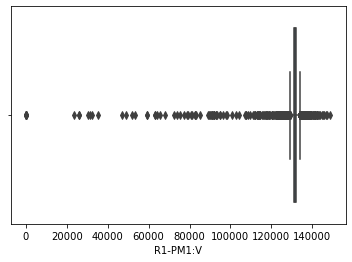

In [269]:
# a boxplot for column R1-PM1:V data
sns.boxplot(sample_data['R1-PM1:V'])
plt.show()

Observation: The graph above shows that column R1-PM1:V has ouliers on the left side

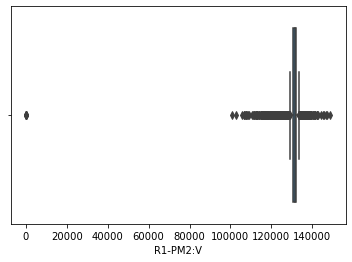

In [270]:
# a boxplot for column R1-PM2:V data
sns.boxplot(data= sample_data, x = sample_data['R1-PM2:V'])
plt.show()

Observation: The graph above shows that column R1-PM2:V has ouliers on the right and one on the left.

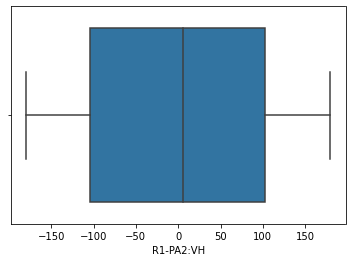

In [271]:
# a boxplot for column R1-PA2:VH data
sns.boxplot(data= sample_data, x = sample_data['R1-PA2:VH'])
plt.show()

The graph above shows that column R1-PA2:VH has no outliers

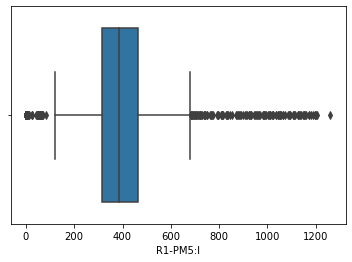

In [272]:
# a boxplot for column R1-PA2:VH data
sns.boxplot(data= sample_data, x = sample_data['R1-PM5:I'])
plt.show()    
    

Observation: The graph above shows that column R1-PM5:I has many ouliers, the datapoints on the left and the right side

Attack      0.704366
Natural     0.245851
NoEvents    0.049783
Name: marker, dtype: float64


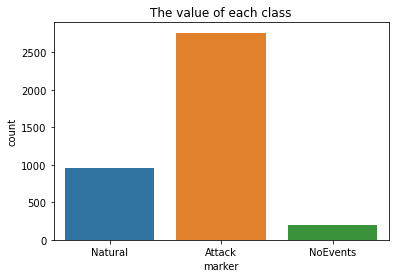

In [273]:
# getting the frequency of each class
marker_column = sample_data['marker'].value_counts(normalize=True)
print(marker_column)

# ploting the weight of each class for easy interpretation
sns.countplot(sample_data['marker'])
plt.title("The value of each class")
plt.show()

Obseravtion: The graph above shows that the Attack class has many observations than natural and NoEvents. Meaning attack scenarios are more than natural and noEvents comes last

### Bi-variate analysis

In [ ]:
# ploting the marker(class) and the R1-PA1:VH column 
plt.scatter(sample_data['marker'],sample_data['R1-PA1:VH'])

# labelling and title
plt.title('marker against R1-PA1:VH')
plt.xlabel('marker')
plt.ylabel('R1-PA1:VH')
plt.show()

attack and natural instances on R1-PA1:VH were almost the same

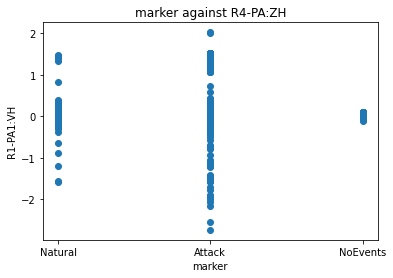

In [275]:
# ploting the marker(class) and the R4-PA:ZH column 
plt.scatter(sample_data['marker'],sample_data['R4-PA:ZH'])

# labelling and title
plt.title('marker against R4-PA:ZH')
plt.xlabel('marker')
plt.ylabel('R1-PA1:VH')
plt.show()

R4-PA:ZH column has many attack values than natural and no events

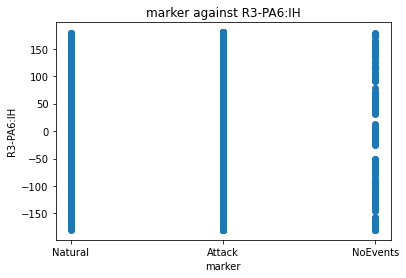

In [276]:
# ploting the marker(class) and the R1-PM3:V column
plt.scatter(sample_data['marker'],sample_data['R3-PA6:IH'])

# labelling and title
plt.title('marker against R3-PA6:IH')
plt.xlabel('marker')
plt.ylabel('R3-PA6:IH')
plt.show()

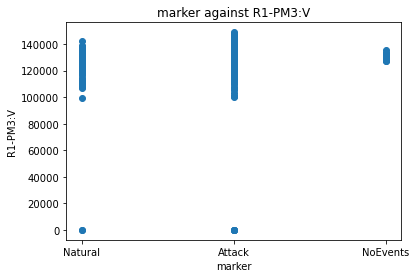

In [277]:
# ploting the marker(class) and the R1-PM3:V column
plt.scatter(sample_data['marker'],sample_data['R1-PM3:V'])

# labelling and title
plt.title('marker against R1-PM3:V')
plt.xlabel('marker')
plt.ylabel('R1-PM3:V')
plt.show()

R1-PM3:V column has fewer records on both classes compared to other columns

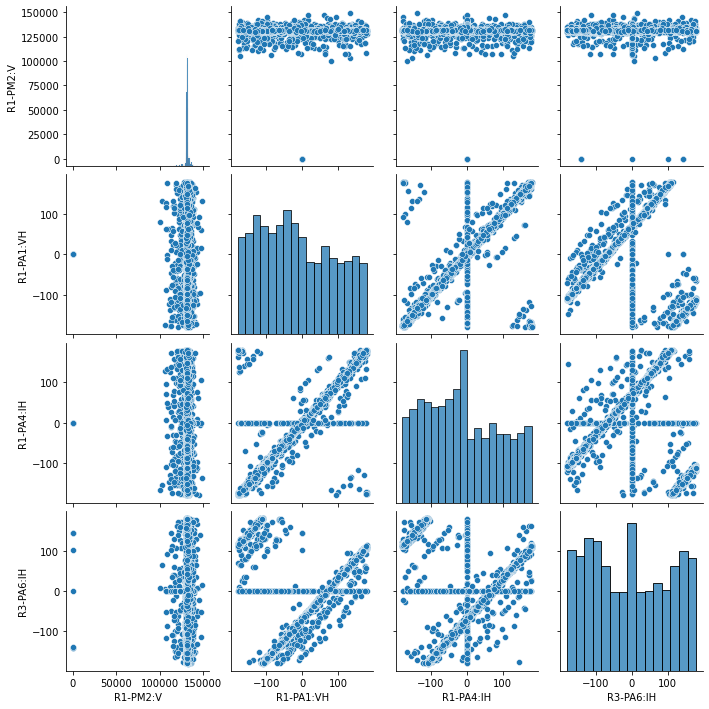

In [278]:
# pairwise bivariate analysis
sns.pairplot(data=sample_data, vars=['R1-PM2:V','R1-PA1:VH','R1-PA4:IH','R3-PA6:IH'])
plt.show()

Observation: The pairplot above of different features, in general shows how some features have outliers, like R1-PA4:IH has outliers and some feature's datapoints are very together others are scattered 

# Preprocessing

### Handling outliers

Detecting outliers using the statistical method interquartile range (IQR). Using Q1 as the 25th percentile and Q3 as the 75th percentile of the dataset. The outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. IQR represents the interquartile range calculated by Q3 minus Q1. 

The outliers are handled by replacing them with the median of median of their respective columns

In [281]:
sample_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0,0,0,0,0,0,0,0,0,Natural
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0,0,0,0,0,0,0,0,0,Attack
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0,0,0,0,0,0,0,0,0,Attack
3952,-1.661578,123686.4409,-121.656129,123084.6824,118.350162,123736.5875,-17.051224,878.19556,-137.578626,883.13953,...,0,0,0,1,1,0,0,0,0,Attack
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0,0,0,0,0,0,0,0,0,Attack
7717,1.426665,124087.6132,-118.550697,123485.8548,121.438405,124137.7598,-14.066114,882.04087,-134.381521,885.51996,...,0,0,0,1,1,0,0,0,0,Attack
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0,0,0,0,0,0,0,0,0,Attack
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0,0,0,0,0,0,0,0,0,Attack


In [282]:
# detecting outliers and replace them with the median of each column 
sample_data_copy = sample_data    # creating a copy of the data
medians = sample_data_copy.median()    # geting the median of the data columnwise

# looping through each column to find outliers and replace them with the median of its whole column
for column in sample_data.columns:
    if column == "marker":
        continue
    q1=sample_data_copy.quantile(0.25)  # 25th percentile
    q3=sample_data_copy.quantile(0.75)  # 75th percentile
    IQR=q3-q1
    lower_bound = q1[column]-(1.5*IQR[column])
    upper_bound = q3[column]+(1.5*IQR[column]) 
    sample_data_copy[column] = np.where((sample_data_copy[column] > upper_bound) | (sample_data_copy[column] < lower_bound),medians[column],sample_data_copy[column] )


In [283]:
sample_data_copy

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Natural
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
3952,-1.661578,131684.8140,-121.656129,131333.7883,118.350162,131734.9606,-17.051224,382.33368,-137.578626,387.27765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
7717,1.426665,131684.8140,-118.550697,131333.7883,121.438405,131734.9606,-14.066114,382.33368,-134.381521,387.27765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


### Label encoding

In [284]:
# changing marker column from categorical to numerical using label encoder
labenc = LabelEncoder()
sample_data_copy.marker = labenc.fit_transform(sample_data_copy.marker)

In [285]:
sample_data_copy

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
60732,-121.300895,132311.6458,118.716855,132261.4993,-1.283425,132386.8656,-114.224866,242.80386,120.664912,257.81888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
32711,-155.643985,131559.4477,84.396683,131534.3744,-35.609327,131609.5942,-156.675309,390.57363,81.572001,399.17980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42788,-50.786979,130907.5427,-170.787260,130280.7109,69.236220,130982.7625,-53.296534,474.25490,-175.233412,483.95973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3952,-1.661578,131684.8140,-121.656129,131333.7883,118.350162,131734.9606,-17.051224,382.33368,-137.578626,387.27765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
40851,-173.829666,132211.3527,66.176625,131559.4477,-53.817926,132261.4993,-167.802150,319.34384,64.600991,352.30364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,-35.718189,130656.8100,-155.689822,130631.7367,84.305010,130732.0298,-41.207125,520.03240,-161.213135,522.04661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7717,1.426665,131684.8140,-118.550697,131333.7883,121.438405,131734.9606,-14.066114,382.33368,-134.381521,387.27765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
28611,-83.743511,131509.3012,156.291427,131434.0813,36.273958,131559.4477,-86.596841,410.53262,153.936571,407.41975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
58012,-63.775932,131383.9348,176.253277,131358.8615,56.235808,131459.1546,-65.414591,417.67391,172.935851,423.16721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Data scaling

In [286]:
# defining the independent and dependent variables
x = sample_data_copy.iloc[:,:-1]  # independent variables
y = sample_data_copy[['marker']].reset_index(drop=True)

In [287]:
# scaling independent variables
scaler=StandardScaler() # scales data to unit variance
x_value=scaler.fit_transform(x) # computes mean and stdev and then uses this to transform data

# dumping the scaled independent variables in a dataframe
x = pd.DataFrame(x_value, columns= x.columns)
x

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-1.047546,1.007571,1.063379,1.324554,-0.068519,1.039173,-1.007400,-1.734011,1.088519,-1.634831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.387023,-0.073122,0.753546,0.328037,-0.419396,-0.089291,-1.431178,0.080465,0.728132,0.105494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.350524,-1.009723,-1.550187,-1.390095,0.652327,-0.999342,-0.399159,1.107993,-1.639289,1.149239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.135075,0.106993,-1.106644,0.053136,1.154366,0.092720,-0.037327,-0.020714,-1.292159,-0.041036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.566786,0.863479,0.589060,0.362400,-0.605523,0.857163,-1.542256,-0.794171,0.571681,-0.471608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,-0.201571,-1.369955,-1.413891,-0.909018,0.806359,-1.363363,-0.278472,1.670099,-1.510039,1.618135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3913,0.165601,0.106993,-1.078609,0.053136,1.185934,0.092720,-0.007527,-0.020714,-1.262686,-0.041036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,-0.676295,-0.145168,1.402593,0.190587,0.315390,-0.162095,-0.731592,0.325543,1.395242,0.206938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3915,-0.478918,-0.325284,1.582803,0.087499,0.519438,-0.307703,-0.520133,0.413231,1.570391,0.400809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handling imbalanced data 



In [288]:
# installing the imlearn library to be able to use smote module  for handling the imbalanced classes
#pip install imblearn

In [289]:
# the first value count of class when it was imbalanced
y.value_counts() 

marker
0         2759
1          963
2          195
dtype: int64

In [290]:
# performing smote to handle the imbalances in the data 
from imblearn.over_sampling import SMOTE

# initialializing smote
smote = SMOTE()

# fiting in the values of x and y
x_res, y_res = smote.fit_resample(x, y)

In [291]:
# the class after balancing the values
y_res.value_counts()

marker
0         2759
1         2759
2         2759
dtype: int64

In [292]:
# defining new x and y to use in model building after handling imbalances and everything
x = x_res
y = y_res


In [293]:
# new x 
x

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-1.047546,1.007571,1.063379,1.324554,-0.068519,1.039173,-1.007400,-1.734011,1.088519,-1.634831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.387023,-0.073122,0.753546,0.328037,-0.419396,-0.089291,-1.431178,0.080465,0.728132,0.105494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.350524,-1.009723,-1.550187,-1.390095,0.652327,-0.999342,-0.399159,1.107993,-1.639289,1.149239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.135075,0.106993,-1.106644,0.053136,1.154366,0.092720,-0.037327,-0.020714,-1.292159,-0.041036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.566786,0.863479,0.589060,0.362400,-0.605523,0.857163,-1.542256,-0.794171,0.571681,-0.471608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,0.228707,-1.355396,-1.020856,-0.929493,1.251309,-1.359496,0.158713,1.583936,-1.106195,1.494767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8273,1.291622,-0.258219,-0.050081,0.084807,-1.329300,-0.276335,1.259392,1.127996,-0.107290,1.192792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8274,0.123245,-1.301258,-1.117337,-0.843488,1.142303,-1.293944,0.064462,1.467489,-1.202576,1.458303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8275,-1.348342,0.040621,0.788770,0.436538,-0.379513,0.064919,-1.386684,0.017880,0.768297,0.021757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
# new y
y

,marker
0,1
1,0
2,0
3,0
4,1
...,...
8272,2
8273,2
8274,2
8275,2


In [295]:
# shapes of new x and y dataframe
x.shape,y.shape

((8277, 128), (8277, 1))

# Model creation and evaluation

### Logistic regression

In [296]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# building logistic regression model 
logreg = LogisticRegression()

# evaluate performance of the model using cross validation 
lr_precision= cross_val_score(logreg, x, y, scoring='precision_weighted', cv=k_folds)
lr_recall = cross_val_score(logreg, x, y, scoring='recall_weighted', cv=k_folds)
lr_f1_score = cross_val_score(logreg, x, y, scoring='f1_weighted', cv=k_folds)

# averages of the performance metrics
lr_precision_avg = lr_precision.mean()
lr_recall_avg = lr_recall.mean()
lr_f1_score_avg = lr_f1_score.mean()

print("Logistic regression precision:",lr_precision_avg)
print("Logistic regression recall:", lr_recall_avg )
print("Logistic regression f1 score:", lr_f1_score_avg)


Logistic regression precision: 0.848798775477413
Logistic regression recall: 0.6137453341044109
Logistic regression f1 score: 0.6575497718794796


### KNN

In [297]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# building KNN classifier model 
knn = KNeighborsClassifier()

# evaluate performance of the model using cross validation 
knn_precision = cross_val_score(knn, x, y, scoring='precision_weighted', cv=k_folds)
knn_recall = cross_val_score(knn, x, y, scoring='recall_weighted', cv=k_folds)
knn_f1_score = cross_val_score(knn, x, y, scoring='f1_weighted', cv=k_folds)

# averages of the performance metrics
knn_precision_avg = knn_precision.mean()
knn_recall_avg = knn_recall.mean()
knn_f1_score_avg = knn_f1_score.mean()

print("KNN precision score:",knn_precision_avg)
print("KNN recall:", knn_recall_avg)
print("KNN f1 score:", knn_f1_score_avg)


KNN precision score: 0.8640114692598931
KNN recall: 0.7573653973094066
KNN f1 score: 0.775280619549477


### Random forest

In [298]:
# building Random Forest model
rf_classifier=RandomForestClassifier(random_state=0)

# evaluate performance of the model using cross validation 
rf_precision= cross_val_score(rf_classifier, x, y, scoring='precision_weighted', cv=k_folds)
rf_recall = cross_val_score(rf_classifier, x, y, scoring='recall_weighted', cv=k_folds)
rf_f1_score = cross_val_score(rf_classifier, x, y, scoring='f1_weighted', cv=k_folds)

# performance metrics averages
rf_precision_avg = rf_precision.mean()
rf_recall_avg = rf_recall.mean()
rf_f1_score_avg =rf_f1_score.mean()

print("Random forest precision:",rf_precision_avg)
print("Random forest recall:", rf_recall_avg)
print("Random forest f1 score:", rf_f1_score_avg)


Random forest precision: 0.9044674254986639
Random forest recall: 0.8578476128723225
Random forest f1 score: 0.8745766553024599


 Observation: 
 Random forest performed better than logistic regression and KNN 

# Feature Selection and Engineering

Feature selection using forward regression was done to select the best relevant features in model construction. It will start with an empty list and add one feature at a time based on the criterion that best features will be having p-value less than the threshold 0.05. The process is repeated until the criterion is not met or there is no significant improvement in the model’s performance.

The selected features will be utilized to build logistic regression, KNN and random forest model and evaluate them using the same metrics used in the previous section

In [299]:
# forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
selected_features=[]

def forward_regression(X, y,threshold_in,verbose=True):    
    """
    forward regression function will select features by fiting ordinary least sqaure model and find features 
    whose pvalue are less than threshold 0.05 and append them to the empty list of significant selected features 
       
    """  
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = statsm.OLS(y, statsm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                selected_features.append(best_feature) #storing the added feature
        if not changed:
            break

#     return included
forward_regression(x,y,0.05)

Add  R4-PM2:V                       with p-value 1.03974e-210
Add  R3-PM2:V                       with p-value 0.0
Add  R3-PM12:I                      with p-value 1.84904e-145
Add  R2-PM3:V                       with p-value 3.44768e-39
Add  R3-PM3:V                       with p-value 7.30179e-86
Add  R1-PA:ZH                       with p-value 6.96321e-53
Add  R4-PM1:V                       with p-value 1.4304e-17
Add  R1-PM2:V                       with p-value 2.44093e-12
Add  R3-PA:ZH                       with p-value 9.43675e-12
Add  R2-PA5:IH                      with p-value 4.89574e-08
Add  R3-PA12:IH                     with p-value 1.48458e-07
Add  R3-PA4:IH                      with p-value 2.05721e-08
Add  R3-PM7:V                       with p-value 6.72022e-08
Add  R3-PM1:V                       with p-value 6.2518e-10
Add  R2-PM1:V                       with p-value 8.39438e-07
Add  R2-PM2:V                       with p-value 1.97747e-07
Add  R2:F                       

In [301]:
# new features identified by stepwise feature selection to be used in model building
print(selected_features,'\n')
print("The number of features selected by stepwise forward regression:",len(selected_features))

['R4-PM2:V', 'R3-PM2:V', 'R3-PM12:I', 'R2-PM3:V', 'R3-PM3:V', 'R1-PA:ZH', 'R4-PM1:V', 'R1-PM2:V', 'R3-PA:ZH', 'R2-PA5:IH', 'R3-PA12:IH', 'R3-PA4:IH', 'R3-PM7:V', 'R3-PM1:V', 'R2-PM1:V', 'R2-PM2:V', 'R2:F', 'R1-PM1:V', 'R1-PM4:I', 'R4-PA:Z', 'R1-PM10:I', 'R4-PM5:I', 'R3-PA6:IH', 'R1-PA12:IH', 'R3-PM6:I', 'R4:F', 'R3-PM4:I', 'R4-PM7:V', 'R2-PM7:V', 'R1:F', 'R2-PM10:I', 'R3-PA10:IH', 'R4-PM10:I'] 

The number of features selected by stepwise forward regression: 33


### Using selected features to build logistic regression, KNN and random forest

In [306]:
# using selected features 
x_new = x[selected_features]
y = y_res

### Logistic regression

In [307]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# building logistic regression model 
log_reg= LogisticRegression()

# evaluate performance of the model using cross validation 
lr_precision2= cross_val_score(log_reg, x_new, y, scoring='precision_weighted', cv=k_folds)
lr_recall2 = cross_val_score(log_reg, x_new, y, scoring='recall_weighted', cv=k_folds)
lr_f1_score2 = cross_val_score(log_reg, x_new, y, scoring='f1_weighted', cv=k_folds)

# the averages of the performance
lr_precision2_avg = lr_precision2.mean()
lr_recall2_avg = lr_recall2.mean()
lr_f1_score2_avg = lr_f1_score2.mean()


print("Logistic regression precision:",lr_precision2_avg)
print("Logistic regression recall:", lr_recall2_avg)
print("Logistic regression f1 score:", lr_f1_score2_avg)


Logistic regression precision: 0.8454000367292757
Logistic regression recall: 0.5917633434391228
Logistic regression f1 score: 0.633527880367278


### KNN

In [308]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# building KNN classifier model 
knn2 = KNeighborsClassifier()

# evaluate performance of the model using cross validation 
knn_precision2= cross_val_score(knn2, x_new, y, scoring='precision_weighted', cv=k_folds)
knn_recall2 = cross_val_score(knn2, x_new, y, scoring='recall_weighted', cv=k_folds)
knn_f1_score2 = cross_val_score(knn2, x_new, y, scoring='f1_weighted', cv=k_folds)

# the averages of the performance
knn_precision2_avg = knn_precision2.mean()
knn_recall2_avg = knn_recall2.mean()
knn_f1_score2_avg = knn_f1_score2.mean()


print("KNN precision score:",knn_precision2_avg)
print("KNN recall:", knn_recall2_avg)
print("KNN f1 score:", knn_f1_score2_avg)


KNN precision score: 0.8640884772665716
KNN recall: 0.7585712282915374
KNN f1 score: 0.782739306231358


### Random forest

In [309]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# building Random Forest model
rf_cl=RandomForestClassifier(random_state=0)

# evaluate performance of the model using cross validation and scoring of accuracy
rf_precision2 = cross_val_score(rf_cl, x_new, y, scoring='precision_weighted', cv=k_folds)
rf_recall2 = cross_val_score(rf_cl, x_new, y, scoring='recall_weighted', cv=k_folds)
rf_f1_score2 = cross_val_score(rf_cl, x_new, y, scoring='f1_weighted', cv=k_folds)

# averages of the performance metrics
rf_precision2_avg = rf_precision2.mean()
rf_recall2_avg =rf_recall2.mean()
rf_f1_score2_avg = rf_f1_score2.mean()

print("Random forest precision:",rf_precision2_avg)
print("Random forest recall:", rf_recall2_avg)
print("Random forest f1 score:", rf_f1_score2_avg)

Random forest precision: 0.8952388154122468
Random forest recall: 0.8433541290620308
Random forest f1 score: 0.8617444955000633


### Comparing the models before and after feature selection to pick a benchmark model

In [310]:
# performance metrics before feature selection
bf_fs = {'Model':['Logistic regression','KNN','Random forest'],
         'Precision':[lr_precision_avg, knn_precision_avg, rf_precision_avg],
         'Recall':[lr_recall_avg, knn_recall_avg, rf_recall_avg],
         'F1 score':[lr_f1_score_avg,knn_f1_score_avg, rf_f1_score_avg]
        }
# putting results in a dataframe
bfs_df = pd.DataFrame(bf_fs)

# performance metrics after feature selection
af_fs = {'Model':['Logistic regression','KNN','Random forest'],
         'Precision':[lr_precision2_avg, knn_precision2_avg, rf_precision2_avg],
         'Recall':[lr_recall2_avg, knn_recall2_avg, rf_recall2_avg],
         'F1 score':[lr_f1_score2_avg,knn_f1_score2_avg, rf_f1_score2_avg]
        }
# putting results in a dataframe
afs_df = pd.DataFrame(af_fs)


# concatinating the before and after feature selection performance metrics results for easy comparison
print('Before feature selection & after feature selection')
pd.concat([d.reset_index(drop=True) for d in [bfs_df,afs_df]], axis=1)

Before feature selection & after feature selection


,Model,Precision,Recall,F1 score,Model,Precision,Recall,F1 score
0,Logistic regression,0.848799,0.613745,0.657550,Logistic regression,0.845400,0.591763,0.633528
1,KNN,0.864011,0.757365,0.775281,KNN,0.864088,0.758571,0.782739
2,Random forest,0.904467,0.857848,0.874577,Random forest,0.895239,0.843354,0.861744


<b> Observation: </b> 
    
Overall, all models performed better before feature selection than after feature selection. This may be because feature selection selected only 33 features among 128 and have lost contents that was important in the model building thus decreasing the performance of the models. 
    
<b> Random forest before feature selection performed best compared to other models and after feature selection.
    Therefore making it the benchmark model </b>
    

# Hyper parameter tuning

### Tuning the benchmark model

In [311]:
# k-fold for cross validation
k_folds = KFold(n_splits = 10)

# defining the search space
search_range={'n_estimators':[10,30,40,50,70,120], 'max_depth':[2,5,10,20,25,30]}
            

In [312]:
# creating GridSearch object using benchmark model 
grid_search=GridSearchCV(estimator=rf_classifier, param_grid=search_range,cv=k_folds, n_jobs=1,verbose=2,scoring='accuracy')

grid_search=grid_search.fit(x,y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n

[CV] END .......................max_depth=5, n_estimators=70; total time=   1.6s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.5s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.6s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.3s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.5s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.2s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.0s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.0s
[CV] END .......................max_depth=5, n_estimators=70; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=120; total time=   2.5s
[CV] END ......................max_depth=5, n_estimators=120; total time=   2.8s
[CV] END ......................max_depth=5, n_estimators=120; total time=   2.0s
[CV] END ...................

[CV] END ......................max_depth=20, n_estimators=40; total time=   1.4s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.4s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.4s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.3s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.4s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.5s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.7s
[CV] END ......................max_depth=20, n_estimators=50; total time=   2.8s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.9s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.9s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.8s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.9s
[CV] END ...................

[CV] END ......................max_depth=30, n_estimators=10; total time=   0.3s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.3s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.3s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.3s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.3s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.0s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.0s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.0s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.4s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.3s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.6s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.6s
[CV] END ...................

In [313]:
# retrieving the the best parameters
print("Hyperparameters that gives the best estimator for the benchmark model:",grid_search.best_params_)

Hyperparameters that gives the best estimator for the benchmark model: {'max_depth': 30, 'n_estimators': 120}


In [318]:
# building the random forest model with best retrieved parameters 
rf= RandomForestClassifier(n_estimators=120, max_depth=30,random_state=1)

# evaluate performance of the model using cross validation and scoring of accuracy
precision= cross_val_score(rf, x, y, scoring='precision_weighted', cv=k_folds)
recall = cross_val_score(rf, x, y, scoring='recall_weighted', cv=k_folds)
f1_score = cross_val_score(rf, x, y, scoring='f1_weighted', cv=k_folds)

precision_avg=precision.mean()
recall_avg = recall.mean()
f1_score_avg = f1_score.mean()


print("Random forest precision:",precision_avg)
print("Random forest recall:",recall_avg )
print("Random forest f1 score:",f1_score_avg)

Random forest precision: 0.9072462345464359
Random forest recall: 0.8605044716658197
Random forest f1 score: 0.8774967949336313


### Vizualizing the performance of the tuned model against the benchmark model selected

In [319]:
# initialize data of lists.
data = {'Metric':['Precision', 'Recall', 'f1_score'],\
        'Benchmark model': [rf_precision_avg, rf_recall_avg, rf_f1_score_avg],\
        'Tuned model':[precision_avg,recall_avg,f1_score_avg]
       }
perform_df = pd.DataFrame(data)
perform_df

,Metric,Benchmark model,Tuned model
0,Precision,0.904467,0.907246
1,Recall,0.857848,0.860504
2,f1_score,0.874577,0.877497


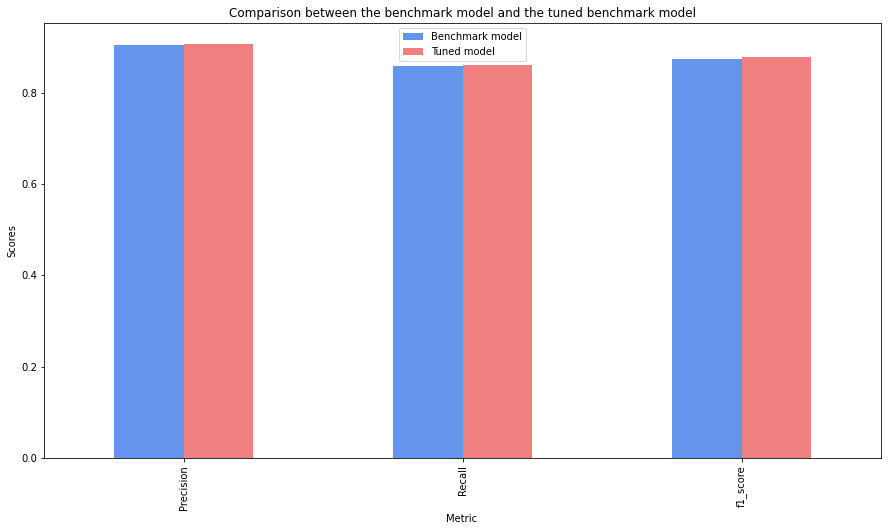

In [320]:
# # plotting a bar graph to compare 
perform_df.plot(x="Metric", y=["Benchmark model", "Tuned model"], kind="bar",\
                      color=['cornflowerblue','lightcoral'],figsize=(15,8))
# plt.plot(data['Metric'], data['Benchmark model']) 
# plt.plot(data['Metric'], data['Tuned model'])
# labelling
plt.xlabel("Metric ")
plt.ylabel("Scores")
plt.title("Comparison between the benchmark model and the tuned benchmark model")

plt.show()

After tuning the benchmark model and building it using hyperpartameters that give best estimators the model performance slighlty increased. 